# News Flare Detection System

The project takes a dataset of newsarticles from various categories and trains different machine learing models on it. It then predicts the categories of other new articles that may be provided to it. The 4 categories of news articles are :  1- World, 2- Sports, 3-Business, 4-Sci/Tech 

The dataset has been taken from kaggle : https://www.kaggle.com/amananandrai/ag-news-classification-dataset



In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import pickle
#Python pickle module is used for serializing and de-serializing python object structures. 
#The process to converts any kind of python objects (list, dict, etc.) into byte streams (0s and 1s) is called pickling
#or serialization or flattening or marshalling. We can converts the byte stream (generated through pickling) back into
#python objects by a process called as unpickling.
#Why Pickle?: In real world sceanario, the use pickling and unpickling are widespread as they allow us to easily transfer data
#from one server/system to another and then store it in a file or database.

import seaborn as sns
sns.set_style("whitegrid")

import altair as alt
alt.renderers.enable('notebook')

from sklearn.model_selection import train_test_split

# Code for hiding seaborn warnings
#import warnings
#warnings.filterwarnings("ignore")

# used to create interactive visualizations. It is declarative and based on pandas dataframe
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Getting the dataset
test = pd.read_csv("test.csv", header=0)

In [3]:
test.head(5)

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [4]:
train = pd.read_csv("train.csv", header=0)

In [5]:
train.head(5)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


# Exploratory Data Analysis

In [6]:
test.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

In [7]:
train.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

## Number of articles in each category
The class ids are numbered 1-4 where 
1 represents World,
2 represents Sports,
3 represents Business and
4 represents Sci/Tech.

In [8]:
train["Class Index"].value_counts()

4    30000
3    30000
2    30000
1    30000
Name: Class Index, dtype: int64

In [9]:
test["Class Index"].value_counts()

3    1900
2    1900
1    1900
4    1900
Name: Class Index, dtype: int64

### Graphical Representation of the number of articles in each category



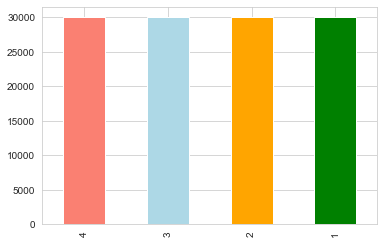

In [10]:
train["Class Index"].value_counts().plot(kind="bar", color=["salmon", "lightblue", "orange", "green"]);

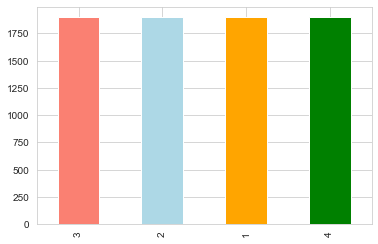

In [11]:
test["Class Index"].value_counts().plot(kind="bar", color=["salmon", "lightblue", "orange", "green"]);

In [12]:
# Are there any missing values?
train.isna().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [13]:
test.isna().sum()

Class Index    0
Title          0
Description    0
dtype: int64

## Here we make a new column named as News length

In [14]:
# for the train data
train['News_length'] = train['Description'].str.len()
# for the test data
test['News_length'] = test['Description'].str.len()

In [15]:
train.head()

,Class Index,Title,Description,News_length
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",94
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,214
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,184
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,195
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",160


In [16]:
test.head()

,Class Index,Title,Description,News_length
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,127
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",234
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,214
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,272
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,179





# Representation of the articles sizes

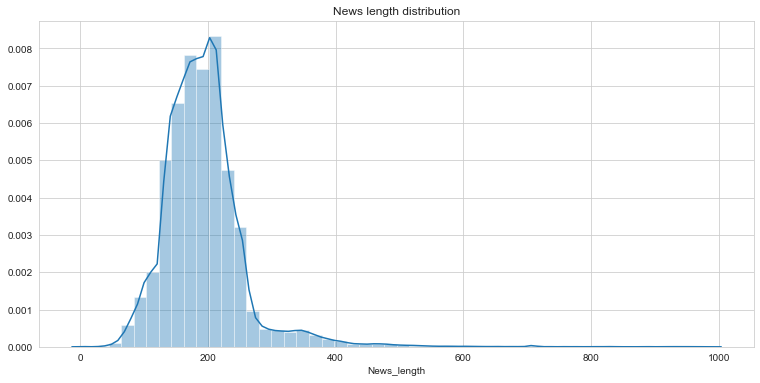

In [17]:
plt.figure(figsize=(12.8,6))
sns.distplot(train['News_length']).set_title('News length distribution');

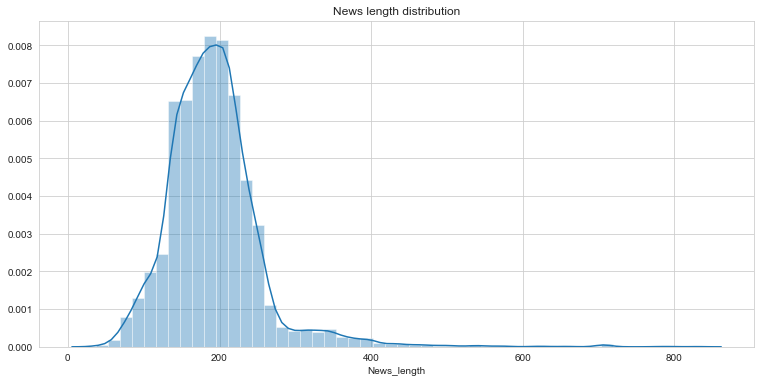

In [18]:
plt.figure(figsize=(12.8,6))
sns.distplot(test['News_length']).set_title('News length distribution');

In [19]:
train["News_length"].describe()

count    120000.000000
mean        193.388517
std          64.472066
min           6.000000
25%         155.000000
50%         188.000000
75%         219.000000
max         985.000000
Name: News_length, dtype: float64

In [20]:
test["News_length"].describe()

count    7600.000000
mean      192.408026
std        63.192774
min        37.000000
25%       154.000000
50%       187.000000
75%       218.000000
max       830.000000
Name: News_length, dtype: float64

# Feature Engineering

In [21]:
import nltk
from nltk.corpus import stopwords

### Checking how does a sample text in our dataset looks like

In [22]:
train.loc[1]['Description']

'Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.'

In [23]:
train.loc[20]['Description']

"The bidding gets underway for Google's public offering, despite last-minute worries over an interview with its bosses in Playboy magazine."

In [24]:
train.loc[40]['Description']

"Target the abusers of legal weapons We can all share the outrage, expressed by columnist Steve Bailey (''Summer Sizzler, quot; Aug. 11), at the killings in the city's poor neighborhoods. But there's no need to share his ignorance. He argues for renewal of the so-called assault weapon ban, claiming that otherwise, ''UZIs and AK-47s could again be flooding the streets. quot; His ..."

In [25]:
train.loc[2]['Description']

'Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.'

In [26]:
train.loc[0]['Description']

"Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

In [27]:
train.loc[10]['Description']

' NEW YORK (Reuters) - Soaring crude prices plus worries  about the economy and the outlook for earnings are expected to  hang over the stock market next week during the depth of the  summer doldrums.'

In [28]:
train.loc[8]['Description']

'Forbes.com - After earning a PH.D. in Sociology, Danny Bazil Riley started to work as the general manager at a commercial real estate firm at an annual base salary of  #36;70,000. Soon after, a financial planner stopped by his desk to drop off brochures about insurance benefits available through his employer. But, at 32, "buying insurance was the furthest thing from my mind," says Riley.'

# Text cleaning
Removing unnecessary symbols, spaces and punctuations

In [29]:
# From the training dataset
train['Content_Parsed_1'] = train['Description'].str.replace("\\"," ")
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace("-","")
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace("&"," ")
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace("#","")
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace(";","")
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace("?","")
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace("!","")
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace(",","")
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace("-","")
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace('"','')
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace('.','')
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace(':','')
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace('(','')
train['Content_Parsed_1'] = train['Content_Parsed_1'].str.replace(')','')

In [30]:
train.loc[1]["Content_Parsed_1"]

'Reuters  Private investment firm Carlyle Group which has a reputation for making welltimed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market'

In [31]:
# From the test dataset
test['Content_Parsed_1'] = test['Description'].str.replace("\\"," ")
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace("-","")
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace("&"," ")
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace("#","")
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace(";","")
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace("?","")
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace("!","")
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace(",","")
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace("-","")
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace('"','')
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace('.','')
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace(':','')
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace('(','')
test['Content_Parsed_1'] = test['Content_Parsed_1'].str.replace(')','')

In [32]:
test.loc[5]["Content_Parsed_1"]

"The British Department for Education and Skills DfES recently launched a Music Manifesto campaign with the ostensible intention of educating the next generation of British musicians Unfortunately they also teamed up with the music industry EMI and various artists to make this popular EMI has apparently negotiated their end well so that children in our schools will now be indoctrinated about the illegality of downloading musicThe ignorance and audacity of this got to me a little so I wrote an open letter to the DfES about it Unfortunately it's pedantic as I suppose you have to be when writing to goverment representatives But I hope you find it useful and perhaps feel inspired to do something similar if or when the same thing has happened in your area"

# Converting the entire text to lowercase

In [33]:
# for the training dataset
train['Content_Parsed_2'] = train['Content_Parsed_1'].str.lower()

In [34]:
# for the test dataset
test['Content_Parsed_2'] = test['Content_Parsed_1'].str.lower()

In [35]:
train.loc[1]["Content_Parsed_2"]

'reuters  private investment firm carlyle group which has a reputation for making welltimed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market'

In [36]:
test.loc[1]["Content_Parsed_2"]

'spacecom  toronto canada  a second team of rocketeers competing for the  3610 million ansari x prize a contest for privately funded suborbital space flight has officially announced the first launch date for its manned rocket'

# Removing Possessive Pronouns

In [37]:
train['Content_Parsed_3'] = train['Content_Parsed_2'].str.replace("'s", "")
test['Content_Parsed_3'] = test['Content_Parsed_2'].str.replace("'s", "")

In [38]:
train.loc[30]["Content_Parsed_3"]

'the company running the japanese nuclear plant hit by a fatal accident is to close its reactors for safety checks'

In [39]:
test.loc[30]["Content_Parsed_3"]

'in  quothelping themselves quot ricky bryant chas gessner michael jennings and david patten did nothing friday night to make bill belichick decision on what to do with his receivers any easier'

# Removing digits from our data as they donot help in analysis

In [40]:
train["Content_Parsed_3"] = train['Content_Parsed_3'].str.replace('\d+', '')

In [41]:
train

,Class Index,Title,Description,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",94,Reuters Shortsellers Wall Street's dwindling ...,reuters shortsellers wall street's dwindling ...,reuters shortsellers wall street dwindling ba...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,214,Reuters Private investment firm Carlyle Group...,reuters private investment firm carlyle group...,reuters private investment firm carlyle group...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,184,Reuters Soaring crude prices plus worries abo...,reuters soaring crude prices plus worries abo...,reuters soaring crude prices plus worries abo...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,195,Reuters Authorities have halted oil export fl...,reuters authorities have halted oil export fl...,reuters authorities have halted oil export fl...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",160,AFP Tearaway world oil prices toppling record...,afp tearaway world oil prices toppling record...,afp tearaway world oil prices toppling record...
...,...,...,...,...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,170,KARACHI Reuters Pakistani President Pervez M...,karachi reuters pakistani president pervez m...,karachi reuters pakistani president pervez m...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,274,Red Sox general manager Theo Epstein acknowled...,red sox general manager theo epstein acknowled...,red sox general manager theo epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,215,The Miami Dolphins will put their courtship of...,the miami dolphins will put their courtship of...,the miami dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...,352,PITTSBURGH at NY GIANTS Time 130 pm Line Steel...,pittsburgh at ny giants time 130 pm line steel...,pittsburgh at ny giants time pm line steelers...


In [42]:
test["Content_Parsed_3"] = test['Content_Parsed_3'].str.replace('\d+', '')

In [43]:
train.loc[8]["Content_Parsed_3"]

'forbescom  after earning a phd in sociology danny bazil riley started to work as the general manager at a commercial real estate firm at an annual base salary of   soon after a financial planner stopped by his desk to drop off brochures about insurance benefits available through his employer but at  buying insurance was the furthest thing from my mind says riley'

# Lemmitization

In [44]:
len(train)

120000

In [45]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Saumya
[nltk_data]     Pandey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Saumya
[nltk_data]     Pandey\AppData\Roaming\nltk_data...


------------------------------------------------------------


[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
from nltk.stem.wordnet import WordNetLemmatizer

In [47]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [48]:
nrows = len(train)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = train.loc[row]['Content_Parsed_3']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [49]:
train['Content_Parsed_5'] = lemmatized_text_list

In [50]:
train.loc[42]['Content_Parsed_5']

'a marlboroughbased technology company be sue five former employees include three senior managers for allegedly conspire against their employer while work on open a compete business'

In [51]:
nrows = len(test)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = test.loc[row]['Content_Parsed_3']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [52]:
test['Content_Parsed_5'] = lemmatized_text_list

In [53]:
train

,Class Index,Title,Description,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_5
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",94,Reuters Shortsellers Wall Street's dwindling ...,reuters shortsellers wall street's dwindling ...,reuters shortsellers wall street dwindling ba...,reuters shortsellers wall street dwindle band...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,214,Reuters Private investment firm Carlyle Group...,reuters private investment firm carlyle group...,reuters private investment firm carlyle group...,reuters private investment firm carlyle group...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,184,Reuters Soaring crude prices plus worries abo...,reuters soaring crude prices plus worries abo...,reuters soaring crude prices plus worries abo...,reuters soar crude price plus worry about the...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,195,Reuters Authorities have halted oil export fl...,reuters authorities have halted oil export fl...,reuters authorities have halted oil export fl...,reuters authorities have halt oil export flow...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",160,AFP Tearaway world oil prices toppling record...,afp tearaway world oil prices toppling record...,afp tearaway world oil prices toppling record...,afp tearaway world oil price topple record an...
...,...,...,...,...,...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,170,KARACHI Reuters Pakistani President Pervez M...,karachi reuters pakistani president pervez m...,karachi reuters pakistani president pervez m...,karachi reuters pakistani president pervez m...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,274,Red Sox general manager Theo Epstein acknowled...,red sox general manager theo epstein acknowled...,red sox general manager theo epstein acknowled...,red sox general manager theo epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,215,The Miami Dolphins will put their courtship of...,the miami dolphins will put their courtship of...,the miami dolphins will put their courtship of...,the miami dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...,352,PITTSBURGH at NY GIANTS Time 130 pm Line Steel...,pittsburgh at ny giants time 130 pm line steel...,pittsburgh at ny giants time pm line steelers...,pittsburgh at ny giants time pm line steelers...


# Tokenizing our dataset

In [54]:
train["Tokenized_sentences"] = train.apply(lambda row: nltk.word_tokenize(row['Content_Parsed_5']), axis=1)
test["Tokenized_sentences"] = test.apply(lambda row: nltk.word_tokenize(row['Content_Parsed_5']), axis=1)

In [55]:

train.head()

,Class Index,Title,Description,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_5,Tokenized_sentences
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",94,Reuters Shortsellers Wall Street's dwindling ...,reuters shortsellers wall street's dwindling ...,reuters shortsellers wall street dwindling ba...,reuters shortsellers wall street dwindle band...,"[reuters, shortsellers, wall, street, dwindle,..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,214,Reuters Private investment firm Carlyle Group...,reuters private investment firm carlyle group...,reuters private investment firm carlyle group...,reuters private investment firm carlyle group...,"[reuters, private, investment, firm, carlyle, ..."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,184,Reuters Soaring crude prices plus worries abo...,reuters soaring crude prices plus worries abo...,reuters soaring crude prices plus worries abo...,reuters soar crude price plus worry about the...,"[reuters, soar, crude, price, plus, worry, abo..."
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,195,Reuters Authorities have halted oil export fl...,reuters authorities have halted oil export fl...,reuters authorities have halted oil export fl...,reuters authorities have halt oil export flow...,"[reuters, authorities, have, halt, oil, export..."
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",160,AFP Tearaway world oil prices toppling record...,afp tearaway world oil prices toppling record...,afp tearaway world oil prices toppling record...,afp tearaway world oil price topple record an...,"[afp, tearaway, world, oil, price, topple, rec..."


In [56]:
test.head()

,Class Index,Title,Description,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_5,Tokenized_sentences
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,127,Unions representing workers at Turner Newall...,unions representing workers at turner newall...,unions representing workers at turner newall...,unions represent workers at turner newall sa...,"[unions, represent, workers, at, turner, newal..."
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",234,SPACEcom TORONTO Canada A second team of roc...,spacecom toronto canada a second team of roc...,spacecom toronto canada a second team of roc...,spacecom toronto canada a second team of roc...,"[spacecom, toronto, canada, a, second, team, o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,214,AP A company founded by a chemistry researche...,ap a company founded by a chemistry researche...,ap a company founded by a chemistry researche...,ap a company found by a chemistry researcher ...,"[ap, a, company, found, by, a, chemistry, rese..."
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,272,AP It's barely dawn when Mike Fitzpatrick sta...,ap it's barely dawn when mike fitzpatrick sta...,ap it barely dawn when mike fitzpatrick start...,ap it barely dawn when mike fitzpatrick start...,"[ap, it, barely, dawn, when, mike, fitzpatrick..."
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,179,AP Southern California's smogfighting agency ...,ap southern california's smogfighting agency ...,ap southern california smogfighting agency we...,ap southern california smogfighting agency go...,"[ap, southern, california, smogfighting, agenc..."


In [57]:
print(test.loc[10]["Tokenized_sentences"])

['los', 'angeles', 'reuters', 'a', 'group', 'of', 'technology', 'company', 'include', 'texas', 'instrument', 'inc', 'lttxnn', 'gt', 'stmicroelectronics', 'ltstmpa', 'gt', 'and', 'broadcom', 'corp', 'ltbrcmo', 'gt', 'on', 'thursday', 'say', 'they', 'will', 'propose', 'a', 'new', 'wireless', 'network', 'standard', 'up', 'to', 'time', 'the', 'speed', 'of', 'the', 'current', 'generation']


# Stopwords

In [58]:
# Download the stopwords list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Saumya
[nltk_data]     Pandey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
train['desc_without_stopwords'] = train['Tokenized_sentences'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))       
train.loc[42]['desc_without_stopwords']

'marlboroughbased technology company sue five former employees include three senior managers allegedly conspire employer work open compete business'

In [61]:
test['desc_without_stopwords'] = test['Tokenized_sentences'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))       
test.loc[10]['desc_without_stopwords']

'los angeles reuters group technology company include texas instrument inc lttxnn gt stmicroelectronics ltstmpa gt broadcom corp ltbrcmo gt thursday say propose new wireless network standard time speed current generation'

In [62]:
train.head()

,Class Index,Title,Description,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_5,Tokenized_sentences,desc_without_stopwords
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",94,Reuters Shortsellers Wall Street's dwindling ...,reuters shortsellers wall street's dwindling ...,reuters shortsellers wall street dwindling ba...,reuters shortsellers wall street dwindle band...,"[reuters, shortsellers, wall, street, dwindle,...",reuters shortsellers wall street dwindle band ...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,214,Reuters Private investment firm Carlyle Group...,reuters private investment firm carlyle group...,reuters private investment firm carlyle group...,reuters private investment firm carlyle group...,"[reuters, private, investment, firm, carlyle, ...",reuters private investment firm carlyle group ...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,184,Reuters Soaring crude prices plus worries abo...,reuters soaring crude prices plus worries abo...,reuters soaring crude prices plus worries abo...,reuters soar crude price plus worry about the...,"[reuters, soar, crude, price, plus, worry, abo...",reuters soar crude price plus worry economy ou...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,195,Reuters Authorities have halted oil export fl...,reuters authorities have halted oil export fl...,reuters authorities have halted oil export fl...,reuters authorities have halt oil export flow...,"[reuters, authorities, have, halt, oil, export...",reuters authorities halt oil export flow main ...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",160,AFP Tearaway world oil prices toppling record...,afp tearaway world oil prices toppling record...,afp tearaway world oil prices toppling record...,afp tearaway world oil price topple record an...,"[afp, tearaway, world, oil, price, topple, rec...",afp tearaway world oil price topple record str...


In [63]:
test.head()

,Class Index,Title,Description,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_5,Tokenized_sentences,desc_without_stopwords
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,127,Unions representing workers at Turner Newall...,unions representing workers at turner newall...,unions representing workers at turner newall...,unions represent workers at turner newall sa...,"[unions, represent, workers, at, turner, newal...",unions represent workers turner newall say 'di...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",234,SPACEcom TORONTO Canada A second team of roc...,spacecom toronto canada a second team of roc...,spacecom toronto canada a second team of roc...,spacecom toronto canada a second team of roc...,"[spacecom, toronto, canada, a, second, team, o...",spacecom toronto canada second team rocketeers...
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,214,AP A company founded by a chemistry researche...,ap a company founded by a chemistry researche...,ap a company founded by a chemistry researche...,ap a company found by a chemistry researcher ...,"[ap, a, company, found, by, a, chemistry, rese...",ap company found chemistry researcher universi...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,272,AP It's barely dawn when Mike Fitzpatrick sta...,ap it's barely dawn when mike fitzpatrick sta...,ap it barely dawn when mike fitzpatrick start...,ap it barely dawn when mike fitzpatrick start...,"[ap, it, barely, dawn, when, mike, fitzpatrick...",ap barely dawn mike fitzpatrick start shift bl...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,179,AP Southern California's smogfighting agency ...,ap southern california's smogfighting agency ...,ap southern california smogfighting agency we...,ap southern california smogfighting agency go...,"[ap, southern, california, smogfighting, agenc...",ap southern california smogfighting agency go ...


## Creating a new dataset
A dataset that has as it's final cloumn the processed data

In [64]:
list_columns = ["Class Index", "Title", "Description", "desc_without_stopwords"]
train = train[list_columns]

train = train.rename(columns={'desc_without_stopwords': 'Content_Parsed'})

In [65]:
list_columns = ["Class Index", "Title", "Description", "desc_without_stopwords"]
test = test[list_columns]

test = test.rename(columns={'desc_without_stopwords': 'Content_Parsed'})

In [66]:
train.head()

,Class Index,Title,Description,Content_Parsed
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",reuters shortsellers wall street dwindle band ...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,reuters private investment firm carlyle group ...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,reuters soar crude price plus worry economy ou...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,reuters authorities halt oil export flow main ...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",afp tearaway world oil price topple record str...


In [67]:
test.head()

,Class Index,Title,Description,Content_Parsed
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,unions represent workers turner newall say 'di...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",spacecom toronto canada second team rocketeers...
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,ap company found chemistry researcher universi...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,ap barely dawn mike fitzpatrick start shift bl...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,ap southern california smogfighting agency go ...


# Export this new dataset for the process of modelling

In [81]:
with open('Modelling_dataset_train.pickle', 'wb') as output:
    pickle.dump(train, output)
with open('Modelling_dataset_test.pickle', 'wb') as output:
    pickle.dump(test, output)    